In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scportrait
import os

/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
# define plotting parameters for consistency across figures and vector graphic export
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'

In [3]:
figures_directory = "../manuscript_figures/Figure_S2/"
os.makedirs(figures_directory, exist_ok=True)

## Fig_S2a Single-Cell Images

In [4]:
img_paths = {
    'GCA': '../figure_data/input_data_Golgi/GCA.h5sc',
    'Monensin': '../figure_data/input_data_Golgi/Monensin.h5sc',
    'Nigericin': '../figure_data/input_data_Golgi/Nigericin.h5sc',
    'Nocodazole': '../figure_data/input_data_Golgi/Nocodazole.h5sc',
    'unstim': '../figure_data/input_data_Golgi/unstim.h5sc',
}

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


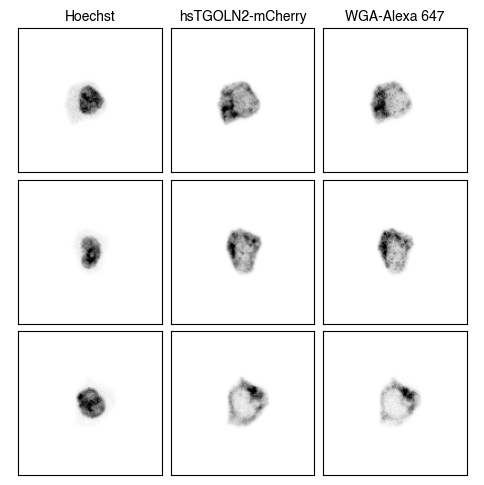

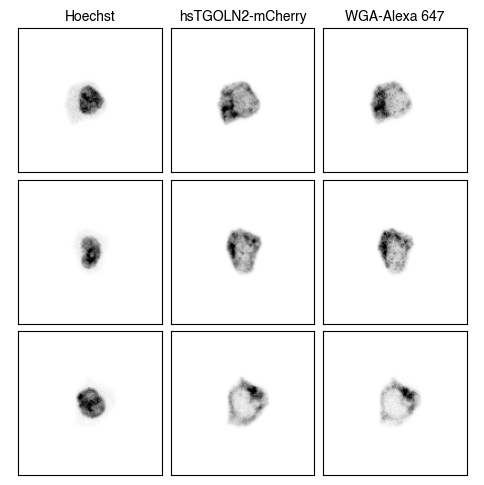

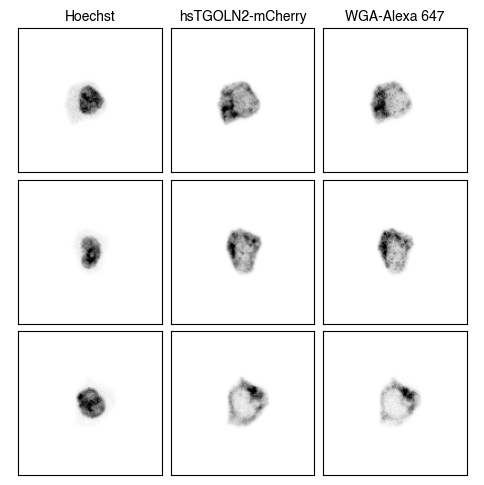

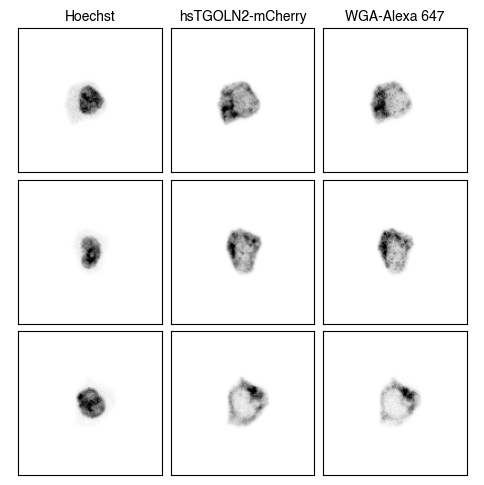

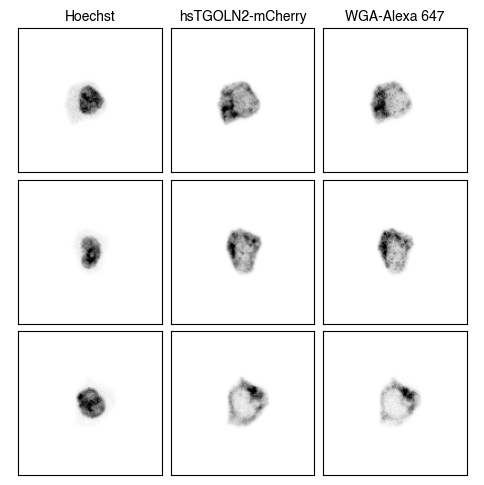

In [5]:
for dataset in list(img_paths.keys()):
    h5sc = scportrait.io.read_h5sc(img_paths[dataset])
    cell_ids = h5sc.obs.iloc[[1001,2001,3001], 0].tolist()

    fig = scportrait.pl.h5sc.cell_grid_multi_channel(h5sc,
                                           select_channels=["Hoechst","hsTGOLN2-mCherry","WGA-Alexa 647"], 
                                           cell_ids=cell_ids, 
                                           show_cell_id=False,
                                           cmap = "Grays", 
                                           return_fig=True)

    fig.savefig(f'{figures_directory}/Fig_S2a_single_cell_images_{dataset}.pdf')

## Fig S2c Visualize Representations

In [6]:
paths = {
    'convnext': '../figure_data/input_data_Golgi/Dataset_B_3channels_convnext.h5ad',
    'cp_measure': '../figure_data/input_data_Golgi/Dataset_B_3channels_cp-measure.h5ad',
    'subcell': '../figure_data/input_data_Golgi/Dataset_B_3channels_subcell.h5ad'
}

In [7]:
ads = {key: sc.read(p) for key, p in paths.items()}

mask = ~np.isnan(ads['cp_measure'].X).any(axis=0)
ads['cp_measure'] = ads['cp_measure'][:, mask]

In [8]:
for key, ad in ads.items():
    print(key)
    sc.pp.scale(ad)
    sc.pp.pca(ad)
    sc.pp.neighbors(ad)
    sc.tl.umap(ad)
    sc.tl.tsne(ad)

convnext


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


cp_measure


/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


subcell


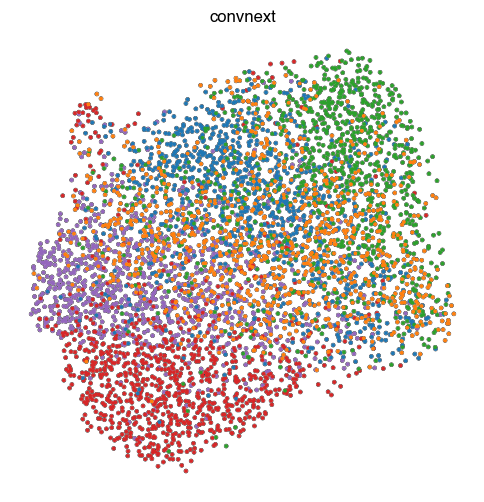

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


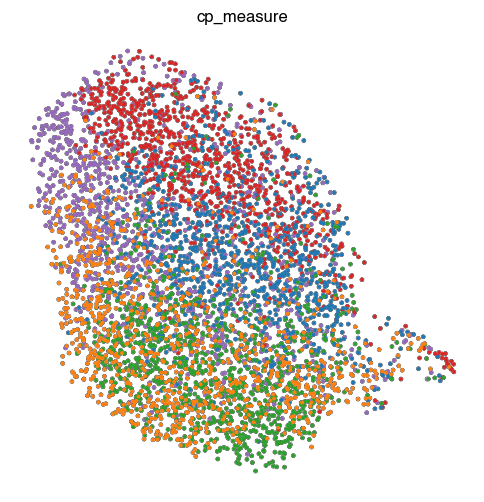

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


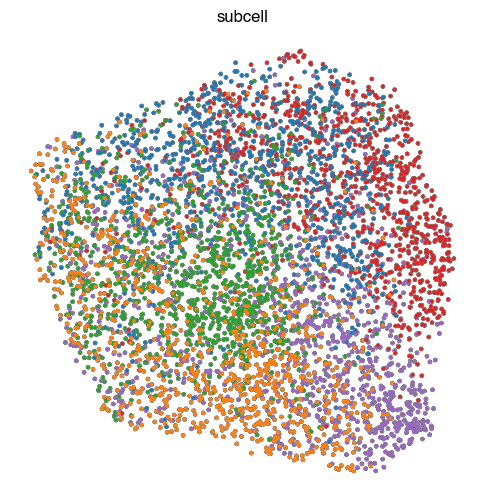

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


In [9]:
for key, ad in ads.items():
    fig, ax = plt.subplots(figsize=(6, 6))
    
    sc.pl.umap(
        ad,
        color = 'perturbation',
        ax = ax,
        s = 30,
        alpha = 1,
        add_outline = True,
        outline_width = (0.1,0),
        title=key,
        frameon=False,
        legend_loc=None,
    )
    ax.set_aspect('equal')
    fig.tight_layout()
    # fig.title(key)
    fig.savefig(f'{figures_directory}/Fig_S2c_umap_{key}.pdf')

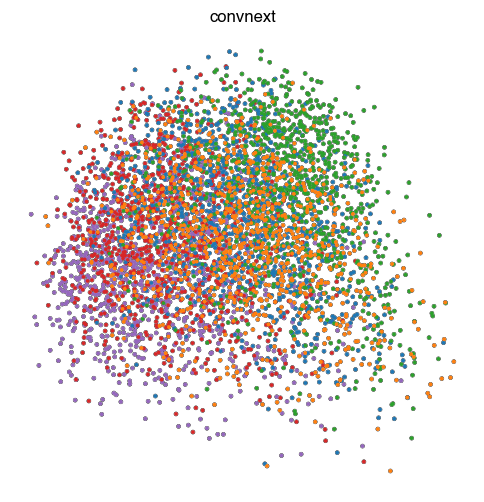

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


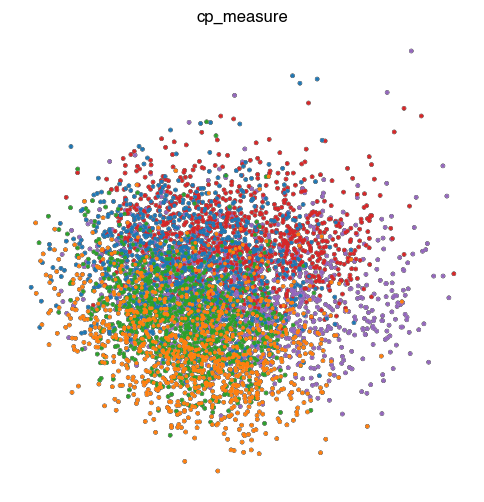

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


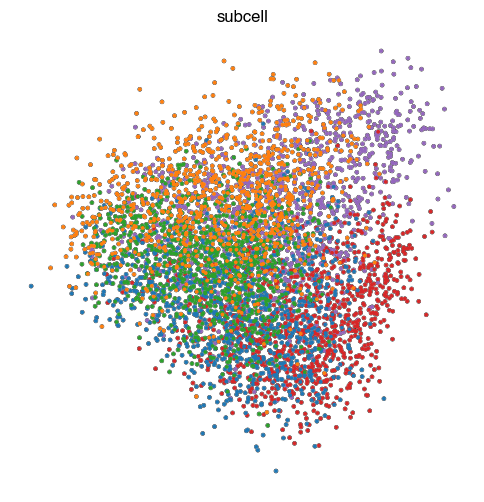

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


In [10]:
for key, ad in ads.items():
    fig, ax = plt.subplots(figsize=(6, 6))
    
    sc.pl.pca(
        ad,
        color = 'perturbation',
        ax = ax,
        s = 30,
        alpha = 1,
        add_outline = True,
        outline_width = (0.1,0),
        title=key,
        frameon=False,
        annotate_var_explained=True,
        legend_loc=None,
    )
    ax.set_aspect('equal')
    fig.tight_layout()
    # fig.title(key)
    fig.savefig(f'{figures_directory}/Fig_S2c_pca_{key}.pdf')

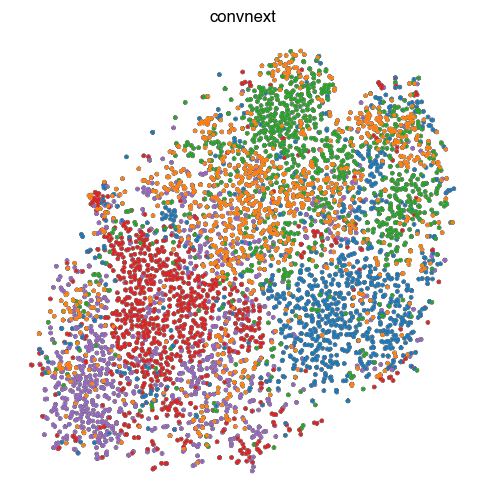

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


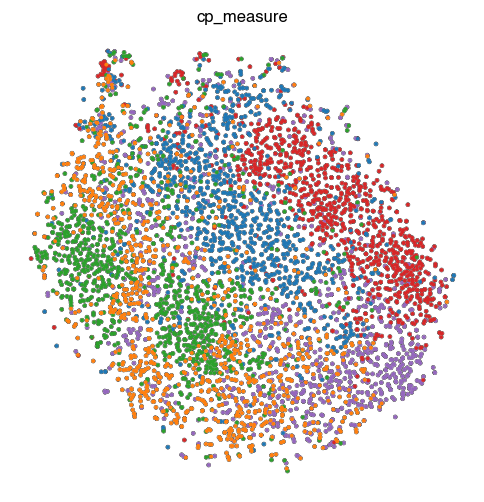

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


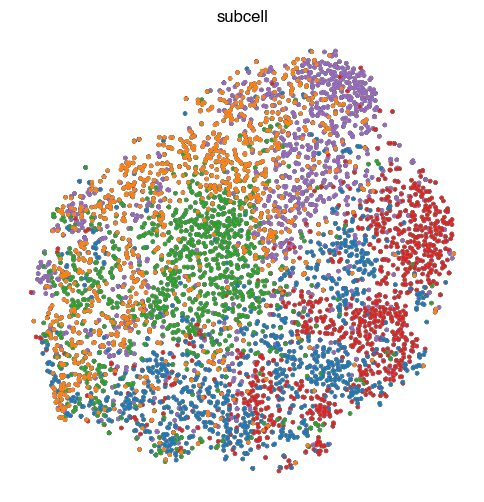

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


In [11]:
for key, ad in ads.items():
    fig, ax = plt.subplots(figsize=(6, 6))
    
    sc.pl.tsne(
        ad,
        color = 'perturbation',
        # palette = {"0h": "#D71920", "2h": "#3B4D81"},#, "1h": "#FFD105"},
        ax = ax,
        s = 30,
        alpha = 1,
        add_outline = True,
        outline_width = (0.1,0),
        title=key,
        frameon=False,
        legend_loc=None,
    )
    ax.set_aspect('equal')
    fig.tight_layout()
    # fig.title(key)
    fig.savefig(f'{figures_directory}/Fig_S2c_tsne_{key}.pdf')